# Logistic Regression for Breast Cancer Classification

This notebook presents the use of logistic regression model to perform binary classification on the breast cancer dataset from the `sklearn.datasets` module. We will build the logistic regression model from scratch.

In [6]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Dataset
First, load the breast cancer dataset using the `load_breast_cancer` function from `sklearn.datasets`. This dataset consists of 569 samples, each with 30 features, and a binary target variable indicating whether the sample is benign or malignant.

### Data Exploration 
Provided in Percenptron.ipynb

In [7]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
#split target and features
X = data.data
y = data.target

## Logistic Regression Model
Next: build logistic regression model from scratch. Logistic regression is a binary classification algorithm that uses a sigmoid function to map the input features to a probability of the positive class.

The equation for logistic regression can be written as:

$y = \sigma(w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n)$

where $y$ is the predicted class probability, $\sigma$ is the sigmoid function, $w_0$ is the bias term, $w_1$ to $w_n$ are the weights for the features $x_1$ to $x_n$. The sigmoid function is defined as:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

where $z$ is the linear combination of the weights and features:

$z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

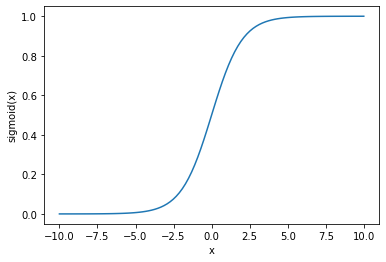

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#Visualize the sigmoid function 
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

## Loss and Gradient Descent
Train the logistic regression model using gradient descent to minimize the loss function.

The cost function (cross-entropy loss function) for logistic regression can be written as:

$J(w) = -\frac{1}{m} \sum_{i=1}^m [y_i\log(y_{pred_i}) + (1-y_i)\log(1-y_{pred_i})]$

where $m$ is the number of samples, $y_i$ is the true label for sample $i$, $y_{pred_i}$ is the predicted label for sample $i$, and $w$ is the vector of weights. The cost function measures the error between the true labels and the predicted labels, penalizing the model heavily for high-confidence incorrect predictions. The goal of training the logistic regression model is to find the values of the weights that minimize this cost function.

## Model Implementation

In [9]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.num_iter):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Predictions
            y_pred = sigmoid(linear_model)
            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class

## Training and Evaluation
To train our logistic regression model, we will split the data into training and testing sets using train_test_split from sklearn.model_selection.

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-8-0132b731e85d>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Test model
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{cm}")

Accuracy: 0.956140350877193
Confusion matrix:
[[41  2]
 [ 3 68]]


<ipython-input-8-0132b731e85d>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
